In [1]:
#Data set of AMAZON 10 years Weekly
#MODEL tried 
#1 Linear regression
#2 ridge regression
#3 Lasso regression
#4 decision trees
#5 Random Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#importing all the libraries

In [3]:
df=pd.read_csv("C:/Users/manish/Downloads/AMZN.csv")
#reading the csv file

In [4]:
df.head()
#seeing the data sample

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-06-06,188.009995,191.759995,185.179993,186.529999,186.529999,20246800
1,2011-06-13,186.809998,192.449997,181.589996,186.369995,186.369995,26501200
2,2011-06-20,185.960007,195.199997,185.570007,192.550003,192.550003,18368100
3,2011-06-27,194.500000,210.270004,194.029999,209.490005,209.490005,22991700
4,2011-07-04,208.759995,218.320007,208.729996,218.279999,218.279999,13045600


In [5]:
df.info()
#information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       523 non-null    object 
 1   Open       523 non-null    float64
 2   High       523 non-null    float64
 3   Low        523 non-null    float64
 4   Close      523 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     523 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.7+ KB


In [6]:
# extracting year and Month from Date object

In [7]:
date=pd.to_datetime(df['Date'])
#converting date to a pandas series

In [8]:
date

0     2011-06-06
1     2011-06-13
2     2011-06-20
3     2011-06-27
4     2011-07-04
         ...    
518   2021-05-10
519   2021-05-17
520   2021-05-24
521   2021-05-31
522   2021-06-04
Name: Date, Length: 523, dtype: datetime64[ns]

In [9]:
type(date)

pandas.core.series.Series

In [10]:
date.dt.year

0      2011
1      2011
2      2011
3      2011
4      2011
       ... 
518    2021
519    2021
520    2021
521    2021
522    2021
Name: Date, Length: 523, dtype: int64

In [11]:
df['Year']=date.dt.year
#making a new column of year

In [12]:
df['Month']=date.dt.month
#making a new column for month

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2011-06-06,188.009995,191.759995,185.179993,186.529999,186.529999,20246800,2011,6
1,2011-06-13,186.809998,192.449997,181.589996,186.369995,186.369995,26501200,2011,6
2,2011-06-20,185.960007,195.199997,185.570007,192.550003,192.550003,18368100,2011,6
3,2011-06-27,194.500000,210.270004,194.029999,209.490005,209.490005,22991700,2011,6
4,2011-07-04,208.759995,218.320007,208.729996,218.279999,218.279999,13045600,2011,7
...,...,...,...,...,...,...,...,...,...
518,2021-05-10,3282.320068,3283.000000,3127.370117,3222.899902,3222.899902,22067100,2021,5
519,2021-05-17,3245.929932,3312.000000,3184.000000,3203.080078,3203.080078,15970100,2021,5
520,2021-05-24,3215.500000,3295.729980,3210.500000,3223.070068,3223.070068,12958900,2021,5
521,2021-05-31,3243.500000,3250.979980,3184.030029,3206.219971,3206.219971,9088500,2021,5


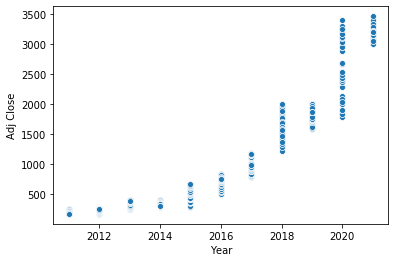

In [14]:
sns.scatterplot(x='Year',y='Adj Close',data=df)
#scatter plot for prices in every year

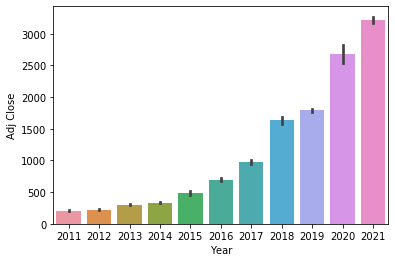

In [15]:
sns.barplot(x='Year',y='Adj Close',data=df)
# As the year increses the close price is also increasing drastically

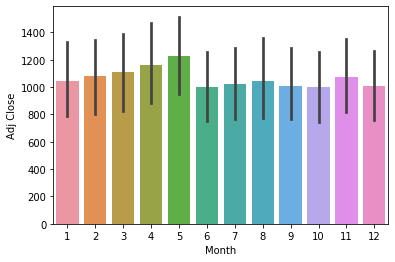

In [16]:
sns.barplot(x='Month',y='Adj Close',data=df)
# starting 5 month have more closing price than rest 

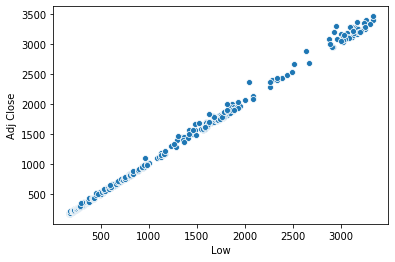

In [17]:
sns.scatterplot(x='Low',y='Adj Close',data=df)
#scatterplot between low and Adj close

In [18]:
#  the Adj close price has nice linear relationship with Low

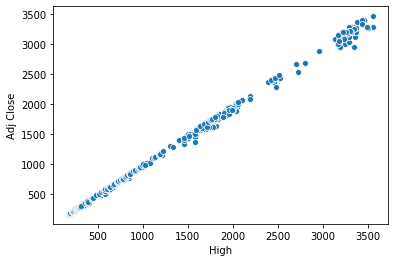

In [19]:
sns.scatterplot(x='High',y='Adj Close',data=df)

In [20]:
#  high also has nice linear relationship with Adj close

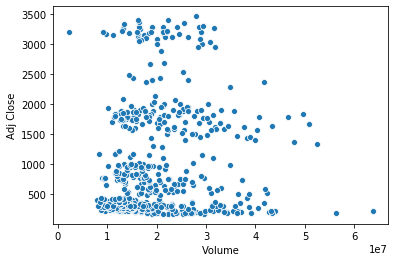

In [22]:
sns.scatterplot(x="Volume",y="Adj Close",data=df)
#no nice relation with Volume

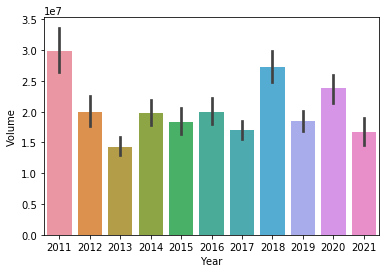

In [23]:
sns.barplot(x='Year',y='Volume',data=df)
#barplot year vs volume

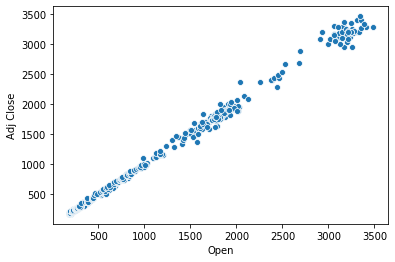

In [24]:
sns.scatterplot(x="Open",y='Adj Close',data=df)
#scatterplot Adj close vs opening price

In [25]:
#linear relationship with open price also

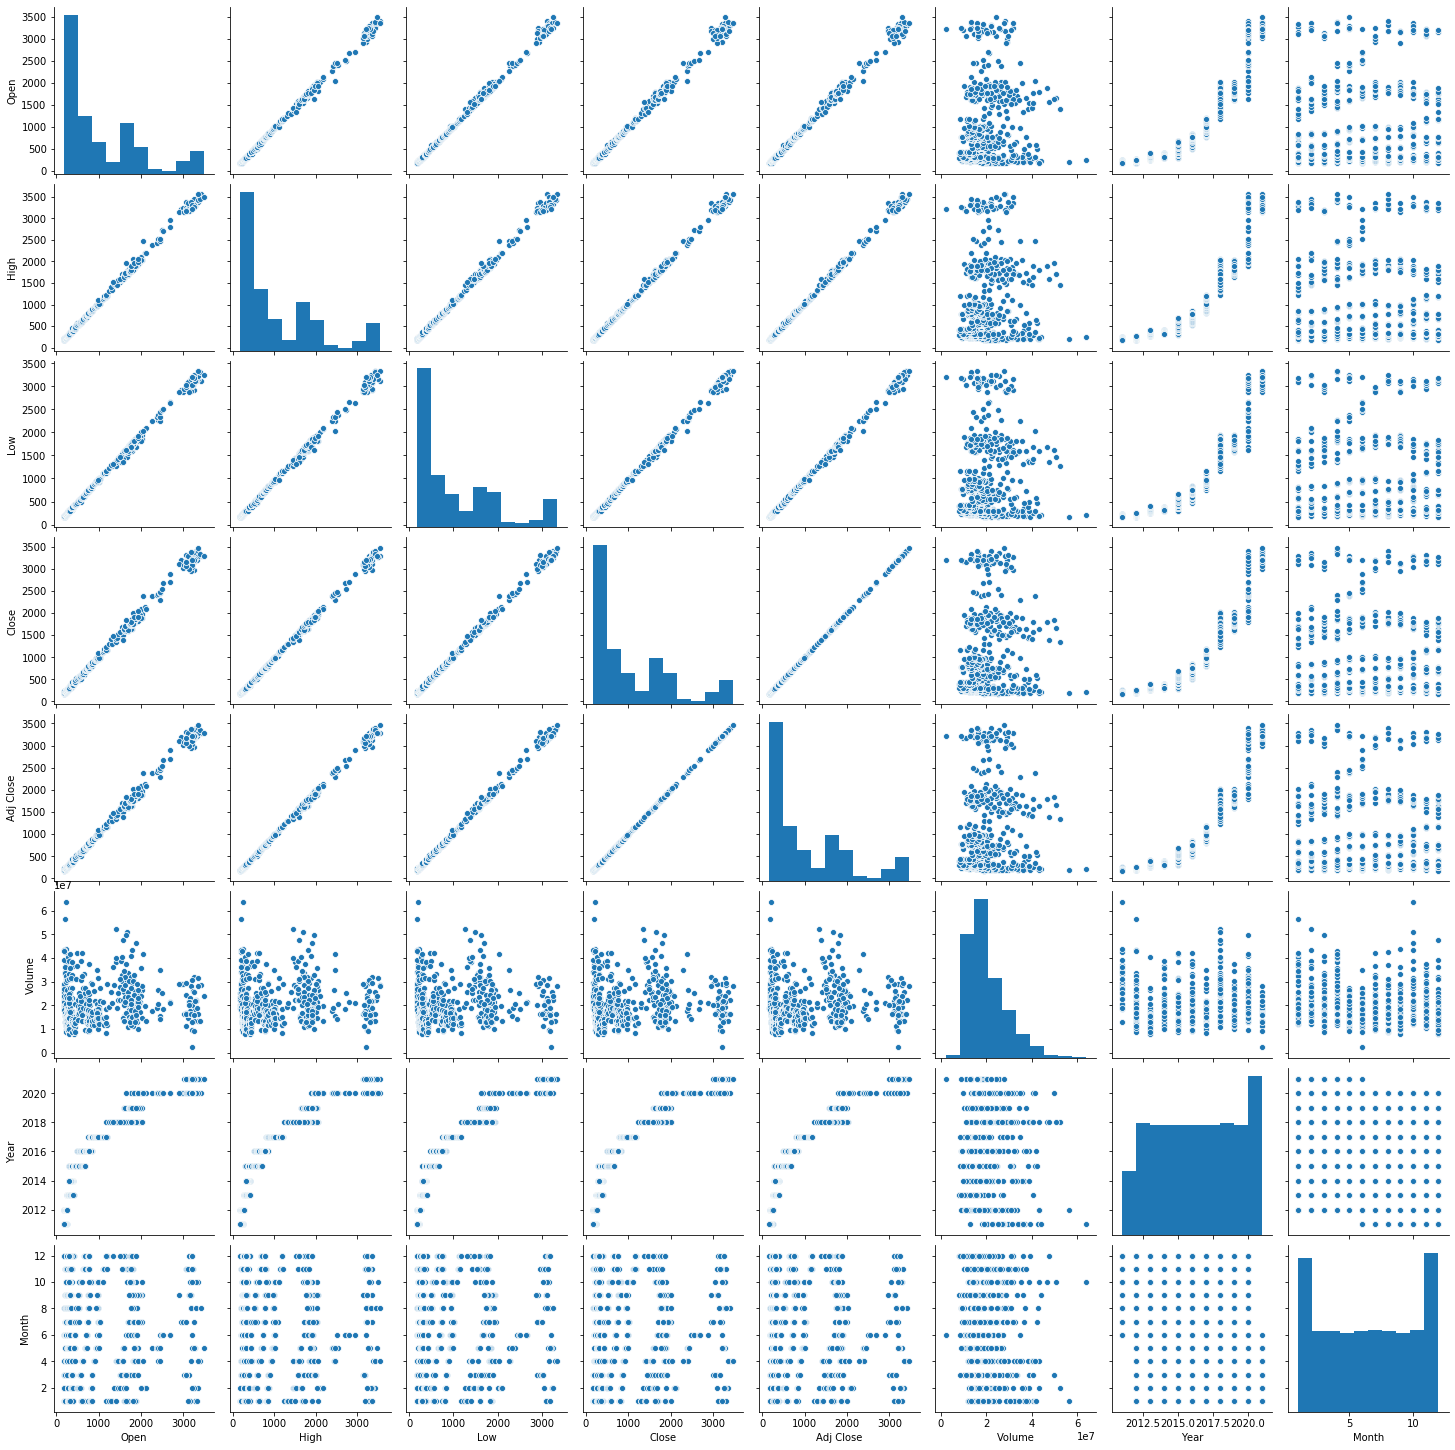

In [26]:
sns.pairplot(df)

In [27]:
#close or adj close are same so w have to drop close
# droppinf Date also as we have extracted year and month from it

In [28]:
df.drop('Close',axis=1,inplace=True)

In [29]:
df

,Date,Open,High,Low,Adj Close,Volume,Year,Month
0,2011-06-06,188.009995,191.759995,185.179993,186.529999,20246800,2011,6
1,2011-06-13,186.809998,192.449997,181.589996,186.369995,26501200,2011,6
2,2011-06-20,185.960007,195.199997,185.570007,192.550003,18368100,2011,6
3,2011-06-27,194.500000,210.270004,194.029999,209.490005,22991700,2011,6
4,2011-07-04,208.759995,218.320007,208.729996,218.279999,13045600,2011,7
...,...,...,...,...,...,...,...,...
518,2021-05-10,3282.320068,3283.000000,3127.370117,3222.899902,22067100,2021,5
519,2021-05-17,3245.929932,3312.000000,3184.000000,3203.080078,15970100,2021,5
520,2021-05-24,3215.500000,3295.729980,3210.500000,3223.070068,12958900,2021,5
521,2021-05-31,3243.500000,3250.979980,3184.030029,3206.219971,9088500,2021,5


In [30]:
df.drop('Date',axis=1,inplace=True)

In [31]:
df

,Open,High,Low,Adj Close,Volume,Year,Month
0,188.009995,191.759995,185.179993,186.529999,20246800,2011,6
1,186.809998,192.449997,181.589996,186.369995,26501200,2011,6
2,185.960007,195.199997,185.570007,192.550003,18368100,2011,6
3,194.500000,210.270004,194.029999,209.490005,22991700,2011,6
4,208.759995,218.320007,208.729996,218.279999,13045600,2011,7
...,...,...,...,...,...,...,...
518,3282.320068,3283.000000,3127.370117,3222.899902,22067100,2021,5
519,3245.929932,3312.000000,3184.000000,3203.080078,15970100,2021,5
520,3215.500000,3295.729980,3210.500000,3223.070068,12958900,2021,5
521,3243.500000,3250.979980,3184.030029,3206.219971,9088500,2021,5


In [32]:
#as no data is missing so we donot have to deal with missing Data

In [33]:
#TEST TRAIN SPLIT

In [34]:
X=df[['Open',"High",'Low','Volume','Year','Month']]
y=df['Adj Close']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model=LinearRegression()

In [39]:
model.fit(X_train,y_train)
#fitting the model on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# EVALUATING our model

In [41]:
model.intercept_

-3287.4554041236856

In [42]:
coefficients_of_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coefficients_of_df

,Coefficient
Open,-5.679865e-01
High,7.852411e-01
Low,7.754623e-01
Volume,4.805461e-08
Year,1.633310e+00
Month,2.597324e-01


In [43]:
#PREDICTIONS of our model

In [44]:
predictions = model.predict(X_test)

In [45]:
predictions

array([1995.26916156,  365.77249562, 1880.28415807,  185.01293781,
        773.3017331 ,  433.6513275 , 3208.53152527, 1663.91875516,
        778.98543898,  240.05780226, 1459.77426482,  334.57638136,
        533.67723549,  311.11231528, 3111.05516742,  273.77694912,
        954.37474002, 1131.98730838, 1589.34784418,  753.8817829 ,
       1797.30822156,  268.01117932, 3487.99578241,  224.30257843,
       1000.23770727,  268.77549989, 1481.91275548, 1438.3710361 ,
        246.67798517, 1831.43850447,  214.29896576,  248.34779532,
        523.9249626 ,  334.85223852,  191.13060936, 3256.68360434,
        978.77731097, 3186.91646994,  992.49284843,  384.44217704,
        852.8658937 , 3176.36555285,  652.40557923,  309.79284794,
       1652.6134982 ,  175.60703355, 2642.20381667, 1794.08470379,
        830.11048714,  317.81478691,  821.09777237, 1303.84050943,
        444.95982854,  190.2298804 , 1756.30053054,  213.29307313,
       3175.64368137,  301.14299859, 1652.98888202,  955.82048

In [46]:
predictions.shape

(131,)

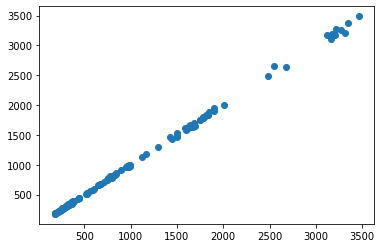

In [47]:
plt.scatter(y_test,predictions)
#scatterplot of predictions vs ytest

In [48]:
#Evaluation METRICS

In [49]:
from sklearn import metrics

In [50]:
 metrics.mean_absolute_error(y_test, predictions)
#mean absolute error

12.222556794965042

In [51]:
metrics.mean_squared_error(y_test, predictions)
#mean squared error

431.6611300598808

In [53]:
(metrics.mean_squared_error(y_test, predictions))**0.5
#RMSE

20.776456147762083

In [54]:
# so our model deflects from 12 USD 
df['Adj Close'].max()

3467.419922

In [55]:
df['Adj Close'].min()

173.100006

In [56]:
df['Adj Close'].mean()

1063.7121403747608

In [57]:
# so our model deflects from 20 usd on average from actual closing price which is not that bad 
#  2% of average price 

In [58]:
# Now we implement lasso regression 
# it is quite similar to linear regression and ridge regression except one term λ*|slope|

In [59]:
from sklearn.linear_model import Lasso

In [67]:
model2=Lasso(max_iter=10000)
#as default iteration are 1000 but after running default I got an warning of not converging 
# I searched and came to know that so it is due to less iteration over data

In [68]:
model2.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
predictions=model2.predict(X_test)

In [71]:
predictions

array([1995.3407428 ,  365.76578727, 1878.50826667,  186.77548239,
        771.57689325,  433.32557114, 3208.67433561, 1662.57687909,
        777.92526981,  241.44477799, 1458.03108816,  334.57586692,
        532.80534649,  309.99240856, 3112.41784446,  274.4829135 ,
        953.30748698, 1130.57564644, 1587.83584153,  752.99796342,
       1796.20957492,  268.92090025, 3489.66281848,  225.71894013,
        998.70396015,  270.2236924 , 1481.94428893, 1437.76312114,
        247.8103708 , 1831.27016918,  216.36004134,  248.79603143,
        523.24994602,  334.63484302,  193.25443871, 3258.6748676 ,
        977.61284524, 3187.87407203,  991.39187943,  384.53950471,
        852.25033648, 3177.30732293,  651.37709202,  309.72193894,
       1651.08387003,  177.73464137, 2642.46644729, 1793.06000628,
        829.00433732,  317.46440707,  820.55551409, 1303.71823319,
        444.47832587,  192.32686973, 1754.54587798,  214.99316413,
       3176.83952595,  301.48056412, 1651.4649661 ,  954.50920

In [72]:
predictions.shape

(131,)

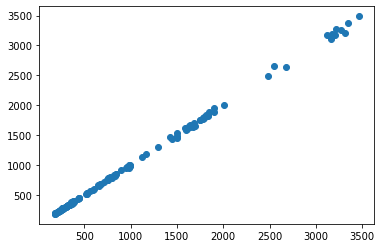

In [73]:
plt.scatter(x=y_test,y=predictions)

In [74]:
# evaluating the model

In [75]:
model2.intercept_

-1641.1897341461736

In [76]:
model2.coef_

array([-5.68226982e-01,  7.84596550e-01,  7.78765885e-01,  3.66579867e-08,
        8.16155312e-01,  8.01937212e-02])

In [79]:
# comparing this with linear regression 
# it help in reducing unwanted dimension from data by assigning it to 0
#but our Data has no such dimension
# It should perform quite similar to linear regression

In [80]:
from sklearn import metrics

In [81]:
metrics.mean_absolute_error(y_test, predictions)

12.12145888414626

In [82]:
metrics.mean_squared_error(y_test, predictions)

430.7390720072138

In [84]:
# now use ridge regression 
# it is quite similar to Lasso but the extra term is  λ*|slope|^2

In [85]:
from sklearn.linear_model import Ridge

In [86]:
model3=Ridge()

In [87]:
model3.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [88]:
predictions=model3.predict(X_test)

In [89]:
predictions

array([1995.26991353,  365.77365148, 1880.27707782,  185.01866519,
        773.29660488,  433.64963379, 3208.53390739, 1663.91483431,
        778.9820314 ,  240.06399558, 1459.76899314,  334.57620767,
        533.67455464,  311.10948395, 3111.05943226,  273.77946168,
        954.37060342, 1131.9830733 , 1589.34345196,  753.87852874,
       1797.30463386,  268.0139562 , 3488.00166811,  224.30777957,
       1000.23277101,  268.77975497, 1481.91167349, 1438.36806695,
        246.68263015, 1831.43806423,  214.30688051,  248.35092063,
        523.92274933,  334.85152487,  191.13850218, 3256.68993036,
        978.77276479, 3186.92141718,  992.4887504 ,  384.44129141,
        852.86255634, 3176.37018599,  652.40286945,  309.79111144,
       1652.60912132,  175.61361112, 2642.20487296, 1794.081188  ,
        830.10714991,  317.81379983,  821.09445621, 1303.83855528,
        444.95780823,  190.23636245, 1756.29527541,  213.29990824,
       3175.64885318,  301.14487939, 1652.98471616,  955.81583

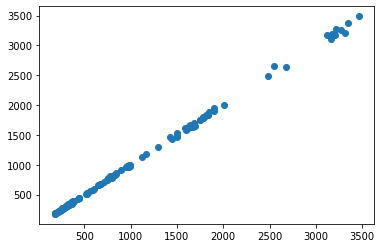

In [90]:
plt.scatter(x=y_test,y=predictions)

In [91]:
model3.intercept_

-3281.202923290594

In [95]:
model3.coef_
#ridge regression is helpful when we have shortage of data 

array([-5.67987878e-01,  7.85240900e-01,  7.75472981e-01,  4.80121866e-08,
        1.63020543e+00,  2.59316844e-01])

In [96]:
from sklearn import metrics

In [97]:
metrics.mean_absolute_error(y_test, predictions)

12.221935135797361

In [98]:
metrics.mean_squared_error(y_test, predictions)

431.6511011112552

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
model4=RandomForestRegressor()


In [101]:
model4.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [102]:
y_test

377    2012.709961
127     369.170013
458    1846.089966
39      184.320007
288     757.770020
          ...     
504    3352.149902
202     445.100006
91      274.190002
178     299.859985
520    3223.070068
Name: Adj Close, Length: 131, dtype: float64

In [103]:
predictions=model4.predict(X_test)

In [105]:
predictions

array([1964.1399939 ,  365.73950153, 1779.91170291,  183.16900257,
        760.58480481,  430.40940938, 3105.18145024, 1770.63751448,
        766.50290056,  234.05470198, 1549.83810186,  332.7150021 ,
        538.82479952,  311.09100131, 3114.98289555,  270.10990055,
        966.15380355, 1138.6960988 , 1625.88212274,  749.0066911 ,
       1820.2736951 ,  263.10879952, 3352.89318832,  224.53179995,
       1005.46169594,  269.74909654, 1538.8874061 , 1448.56697868,
        246.59550271, 1804.57040633,  216.09530011,  253.86030076,
        525.22940525,  332.54380684,  189.29299898, 3266.63782696,
        972.71530021, 3205.13148196, 1003.25699568,  383.34769757,
        848.83610167, 3252.8612646 ,  635.75310542,  306.5598987 ,
       1596.07761472,  182.46020177, 2530.93413572, 1785.72788564,
        843.02170164,  313.3457997 ,  820.46710636, 1353.3156959 ,
        432.63870841,  191.40769853, 1778.67459095,  212.14279958,
       3197.43298813,  303.93170163, 1736.24599353,  966.16448

In [107]:
metrics.mean_absolute_error(y_test, predictions)

20.783292806793927

In [108]:
metrics.mean_squared_error(y_test, predictions)

1377.1728441788753

In [109]:
df
# now lets look assume adj_close =low+high /2 


,Open,High,Low,Adj Close,Volume,Year,Month
0,188.009995,191.759995,185.179993,186.529999,20246800,2011,6
1,186.809998,192.449997,181.589996,186.369995,26501200,2011,6
2,185.960007,195.199997,185.570007,192.550003,18368100,2011,6
3,194.500000,210.270004,194.029999,209.490005,22991700,2011,6
4,208.759995,218.320007,208.729996,218.279999,13045600,2011,7
...,...,...,...,...,...,...,...
518,3282.320068,3283.000000,3127.370117,3222.899902,22067100,2021,5
519,3245.929932,3312.000000,3184.000000,3203.080078,15970100,2021,5
520,3215.500000,3295.729980,3210.500000,3223.070068,12958900,2021,5
521,3243.500000,3250.979980,3184.030029,3206.219971,9088500,2021,5


In [110]:
df['Avg']=(df['Low']+df['High'])/2

In [111]:
df

,Open,High,Low,Adj Close,Volume,Year,Month,Avg
0,188.009995,191.759995,185.179993,186.529999,20246800,2011,6,188.469994
1,186.809998,192.449997,181.589996,186.369995,26501200,2011,6,187.019996
2,185.960007,195.199997,185.570007,192.550003,18368100,2011,6,190.385002
3,194.500000,210.270004,194.029999,209.490005,22991700,2011,6,202.150002
4,208.759995,218.320007,208.729996,218.279999,13045600,2011,7,213.525001
...,...,...,...,...,...,...,...,...
518,3282.320068,3283.000000,3127.370117,3222.899902,22067100,2021,5,3205.185059
519,3245.929932,3312.000000,3184.000000,3203.080078,15970100,2021,5,3248.000000
520,3215.500000,3295.729980,3210.500000,3223.070068,12958900,2021,5,3253.114990
521,3243.500000,3250.979980,3184.030029,3206.219971,9088500,2021,5,3217.505004


In [112]:
metrics.mean_absolute_error(df['Adj Close'],df['Avg'])

16.499102270554495

In [113]:
metrics.mean_squared_error(df['Adj Close'],df['Avg'])

766.5252372413092

In [114]:
# random forest regressor has very poor performance
# it performed poor that just taking adj close=low+high/2

In [115]:
# 5th model is Decision trees

In [116]:
from sklearn.tree import DecisionTreeRegressor

In [117]:
model5=DecisionTreeRegressor()

In [119]:
model5.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [120]:
predictions=model5.predict(X_test)

In [121]:
predictions

array([2011.      ,  372.059998, 1785.      ,  179.130005,  755.049988,
        426.950012, 3128.810059, 1712.430054,  780.369995,  239.300003,
       1575.390015,  337.48999 ,  529.440002,  316.339996, 3089.48999 ,
        277.690002,  968.      , 1129.880005, 1620.800049,  735.440002,
       1839.339966,  261.73999 , 3291.610107,  224.740005, 1006.72998 ,
        272.119995, 1575.390015, 1405.22998 ,  249.190002, 1788.609985,
        212.889999,  259.149994,  522.619995,  338.290009,  189.979996,
       3249.899902,  968.      , 3256.929932, 1003.73999 ,  384.23999 ,
        852.460022, 3162.580078,  620.5     ,  308.01001 , 1665.530029,
        182.610001, 2436.879883, 1807.579956,  845.23999 ,  316.01001 ,
        810.200012, 1339.599976,  422.869995,  195.039993, 1757.51001 ,
        216.479996, 3201.649902,  312.23999 , 1712.430054,  967.98999 ,
        338.290009, 1640.560059, 1712.359985, 1807.579956,  552.080017,
        234.970001,  760.590027,  894.880005, 3201.649902, 1602.

In [122]:
metrics.mean_absolute_error(y_test, predictions)

24.424121664122154

In [123]:
metrics.mean_squared_error(y_test, predictions)

1810.6591267234028

In [125]:
#this model also performed poorly than just taking average of low and high

In [126]:
# Comparing ALL models

In [143]:
# 1 comparing mean absolute error
model_name=['Linear Regression','Lasso Regression','Ridge Regression','Random forest regressor','Decision tree regressor','Avg of low high']

<BarContainer object of 6 artists>

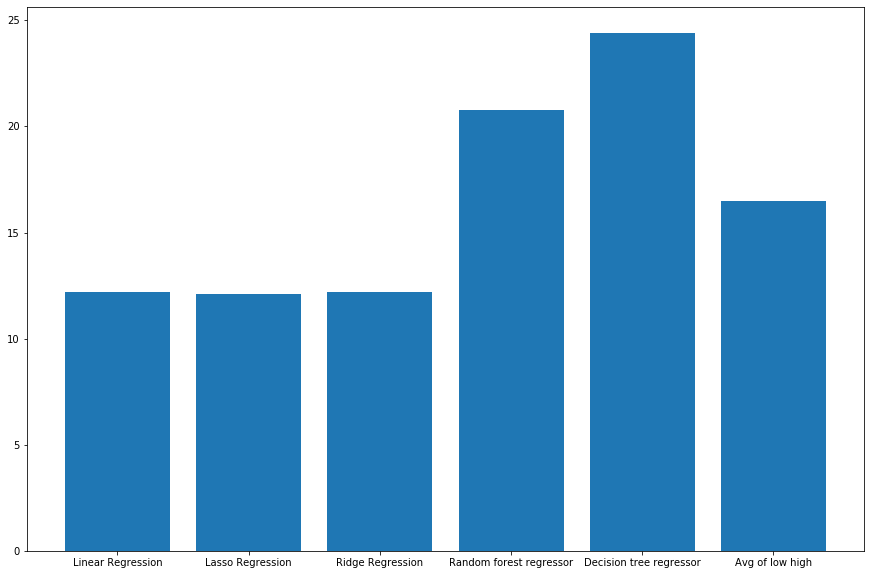

In [148]:
MAE=[12.22,12.12,12.22,20.78,24.4,16.5]
plt.figure(figsize=(15,10))
plt.bar(model_name,MAE)
#plotting the MAE of all models

<BarContainer object of 6 artists>

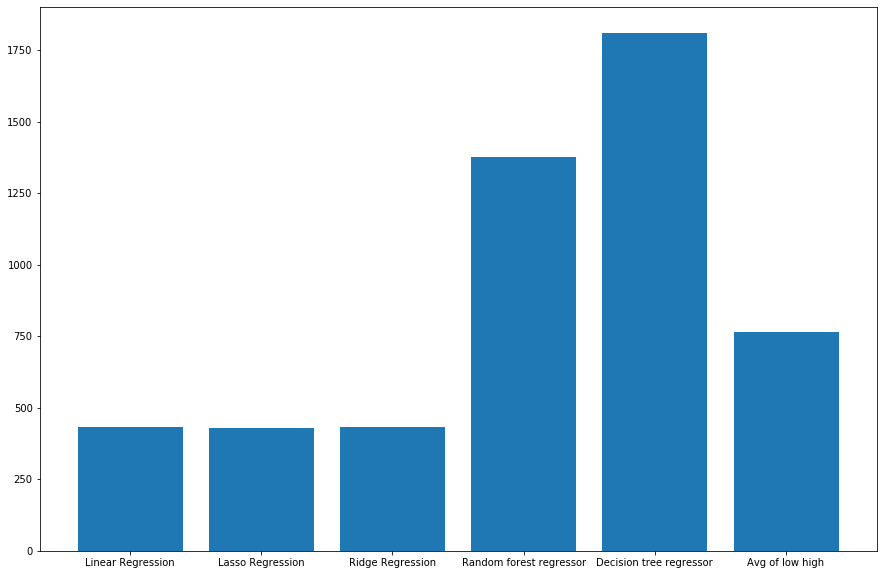

In [149]:
MSE=[431.66,430.73,431.65,1377.17,1810.65,766.5]
plt.figure(figsize=(15,10))
plt.bar(model_name,MSE)
#plotting the MSE for all models

<BarContainer object of 6 artists>

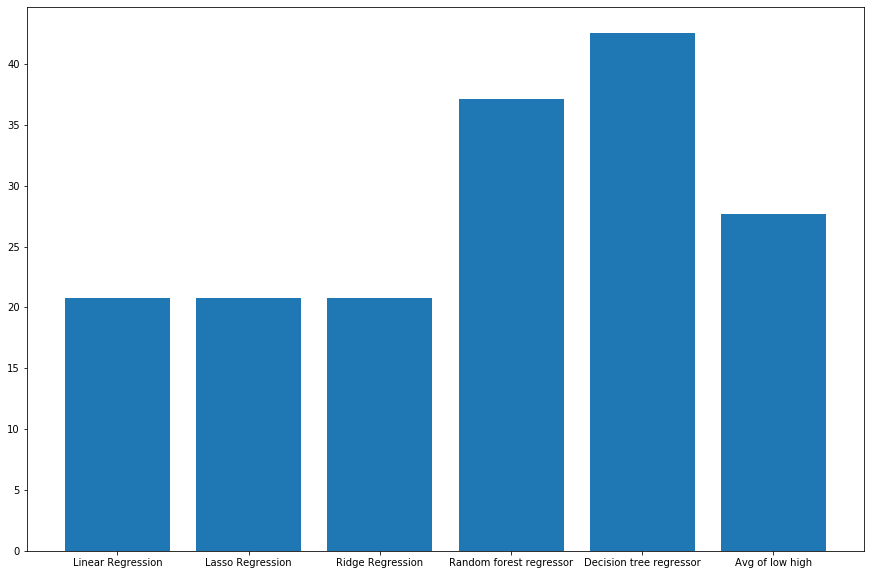

In [156]:
MSE=[431.66,430.73,431.65,1377.17,1810.65,766.5]
RMSE=list(map(np.sqrt,MSE))
RMSE
plt.figure(figsize=(15,10))
plt.bar(model_name,RMSE)
#plotting the rmse for all models

In [157]:
# by analysing All the graphs we can say that linear regression lasso regression and ridge regression performs quite similar
# lasso is best among these 3
#decision tree regressor and random forest regressor performed poorly 
#these two are less accurate than just taking avg of low and high